## Random Forest

Group 6

Members (Student ID/Email): Abigail Keller (2026918, akelle30@depaul.edu), Kara Faciszewski (1976775, kfacisze@depaul.edu), Joel Fernandez (1394698, jferna26@depaul.edu), Elizabeth Kerrigan (1994142, ekerrig3@depaul.edu). Srinath V.S. (1979936 , SVANAMAM@depaul.edu)

In [1]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

#### Data Import

In [2]:
# Read HR_Employee.csv
X = pd.read_csv('./Data/HR_Employee.csv')
# Read Attrition.csv
y = pd.read_csv('./Data/Attrition.csv')
#Read PCA_HR_Employee.csv
PCA_X = pd.read_csv('./Data/PCA_HR_Employee.csv')
# Read KPCA_HR_Employee.csv
KPCA_X = pd.read_csv('./Data/KPCA_HR_Employee.csv')

#### Functions 

In [3]:
# Function:    fitModel
# Input:       Classifier
# Returns:     Fitted Model
def fitModel(model):
    clf = model
    clf.fit(X_train, y_train.values.ravel())
    
    return clf

In [4]:
from sklearn.metrics import accuracy_score
# Function:    modelAccuracy
# Input:       Classifier with Best Estimator, X train, X test
# Output:      Prints Training & Testing Accuracy
# Returns:     Testing Accuracy, Y Test Predictions
def modelAccuracy(model, X_train, X_test):
    clf = model

    # Make Train predictions
    y_train_pred = clf.predict(X_train)
    # Calculate accuracy score
    training_accuracy = accuracy_score(y_train, y_train_pred)
    print('Training Accuracy: ',training_accuracy)
    # confusionMatrixMetrics(y_train, y_pred)

    # Make Test predictions
    y_test_pred = clf.predict(X_test)
    # Calculate accuracy scores
    testing_accuracy = accuracy_score(y_test, y_test_pred)
    print('Testing Accuracy:  ',testing_accuracy)

    return testing_accuracy, y_test_pred

In [5]:
from sklearn.model_selection import GridSearchCV
# Function:    gridSearcBestEstimator
# Input:       Classifier, parameters, cross validation, X train, X test
# Output:      Prints Best Estimator
# Returns:     Best Estimator
def gridSearcBestEstimator(model, params, cv, X_train, X_test):
    clf = model
    gs = GridSearchCV(estimator=clf, param_grid=params, scoring='f1', cv=cv, n_jobs=-1, )

    gs.fit(X_train, y_train.values.ravel())
    best_estimator = gs.best_estimator_

    print('Best Estimator:')
    print(best_estimator,'\n')

    # Required For Decision Tree Classifier
    from sklearn.tree import DecisionTreeClassifier
    if model == DecisionTreeClassifier():
        best_estimator.get_depth()

    return best_estimator

In [6]:
from sklearn.metrics import confusion_matrix
# Function:    confusionMatrix
# Input:       Training/Testing dataframe and predictions
# Output:      Prints Formatted Confusion Matrix
# Returns:     Confusion Matrix Array
# URL:         https://towardsdatascience.com/evaluating-machine-learning-classification-problems-in-python-5-1-metrics-that-matter-792c6faddf5
def confusionMatrix(true, pred):
    cm = confusion_matrix(true, pred.round(), normalize=None)

    # Assigning columns names
    cm_df = pd.DataFrame(cm,
                        columns = ['Predicted Negative', 'Predicted Positive'],
                        index = ['Actual Negative', 'Actual Positive'])

    # Printing Formatted Confusion Matrix
    print('\n',cm_df)

    return cm

In [7]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
# Function:    metrics
# Input:       confusion matrix array, true class values, predicted class values
# Output:      Prints Recall, Sensitivity, Precision, False Positive Rate, Balanced Accuracy & F1 Scores
# Return:      recall, specificity, precision, balanced_accuracy, F1
def metrics(cm, true, pred):
    # Assign values from the confusion matrix to manually
    # calculate Specificity and False Positive Rate
    TP = cm[1][1]
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]

    # Recall
    recall = recall_score(true, pred)
    print('\nRecall:                  ', recall)
    # Sensitivity
    sensitivity = recall
    # Specificity
    specificity = (TN / float(TN + FP))
    print('Specificity:             ', specificity)
    # Precision
    precision = precision_score(true, pred)
    print('Precision:               ', precision)
    # False Positive Rate
    # fpr = (FP / float(TN + FP))
    # print ('False Positive Rate:     ', fpr)
    # Balanced Accuracy
    balanced_accuracy = (sensitivity + specificity)/2
    #balance_accuracy = metrics.balanced_accuracy_score(y_true, y_pred)
    print('Balanced Accuracy:       ', balanced_accuracy)
    # F1 Score Method 1: sklearn
    F1 = f1_score(true, pred)
    print('F1-Score:                ', F1)

    return recall, specificity, precision, balanced_accuracy, F1

In [8]:
# Function:    heatMap
# Input:       true y values, predicted y values
# Output:      Heat Map Of Confusion Matrix
def heatMap(y_true, y_pred):
    cm_plot =  pd.crosstab(index=y_true.values.ravel(), columns=y_test_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(cm_plot, annot=True, square=False, fmt='', cbar=False)
    plt.title("Confusion Matrix", fontsize = 15)
    plt.show()

### Train/Test Data Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2020)
# Train Test Split for PCA
PCA_X_train, PCA_X_test, PCA_y_train, PCA_y_test = train_test_split(PCA_X, y, test_size=0.30, random_state=2020)
# Train Test Split for KPCA
KPCA_X_train, KPCA_X_test, KPCA_y_train, KPCA_y_test = train_test_split(KPCA_X, y, test_size=0.30, random_state=2020)

### Cross Validation

In [10]:
# Cross Validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [11]:
Table = pd.DataFrame(index = ['Model','Testing Accuracy', 'Recall', 'Specificity', 'Precision', 'Balanced Accuracy', 'F1 Score'])

### Default Random Forest Classifier

Training Accuracy:  1.0
Testing Accuracy:   0.8503401360544217

                  Predicted Negative  Predicted Positive
Actual Negative                 369                   2
Actual Positive                  64                   6


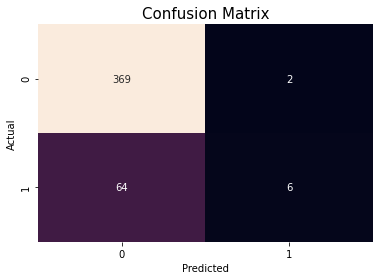


Recall:                   0.08571428571428572
Specificity:              0.9946091644204852
Precision:                0.75
Balanced Accuracy:        0.5401617250673855
F1-Score:                 0.15384615384615383


<BarContainer object of 5 artists>

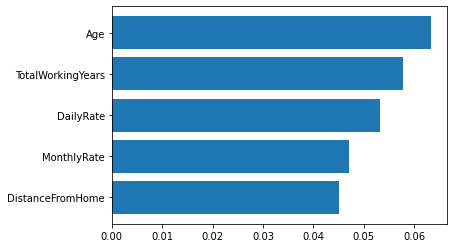

In [12]:
# Fit Model to Default Classifier
clf = RandomForestClassifier().fit(X_train, y_train.values.ravel())

# Calcualate Training and Testing Accuracy
testing_accuracy, y_test_pred = modelAccuracy(clf,  X_train, X_test)

# Print Confusion Matrix
cm = confusionMatrix(y_test, y_test_pred)

# Heat Map
heatMap(y_test, y_test_pred)

# Print Metrics
recall, specificity, precision, balanced_accuracy, F1 = metrics(cm, y_test, y_test_pred)

# Populate Table
Table['Random Forest Default Classifier'] = ['RandomForestClassifier()', testing_accuracy, recall, specificity, precision, balanced_accuracy, F1]

#Feature Importance
top_n = np.argsort(clf.feature_importances_)[-5:]
plt.barh(X.columns[top_n], clf.feature_importances_[top_n])

### GridSearch - Random Forest

Best Estimator:
RandomForestClassifier(min_samples_split=5, n_estimators=50) 

Training Accuracy:  0.9854227405247813
Testing Accuracy:   0.8503401360544217

                  Predicted Negative  Predicted Positive
Actual Negative                 369                   2
Actual Positive                  64                   6


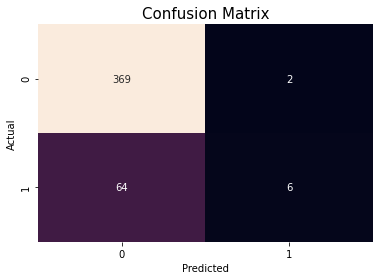


Recall:                   0.08571428571428572
Specificity:              0.9946091644204852
Precision:                0.75
Balanced Accuracy:        0.5401617250673855
F1-Score:                 0.15384615384615383


<BarContainer object of 5 artists>

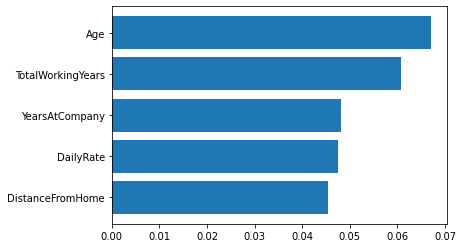

In [14]:
# Determine Best Estimator
params = dict(
    min_samples_split = [5, 10, 20, 30, 40, 50],
    max_depth = [1,2,3,None],
    n_estimators = [50, 100, 150, 200, 250]
)
best_estimator = gridSearcBestEstimator(RandomForestClassifier(), params, cv, X_train, y_train)

# Fit Model to best_estimator
clf = best_estimator.fit(X_train, y_train.values.ravel())

# Calcualate Training and Testing Accuracy
testing_accuracy, y_test_pred = modelAccuracy(clf, X_train, X_test)

# Print Confusion Matrix
cm = confusionMatrix(y_test, y_test_pred)

# Heat Map
heatMap(y_test, y_test_pred)

# Print Metrics
recall, specificity, precision, balanced_accuracy, F1 = metrics(cm, y_test, y_test_pred)

# Populate Table
Table['Random Forest Best Estimator'] = ['RandomForestClassifier(min_samples_split = 5, n_estimators=250)', testing_accuracy, recall, specificity, precision, balanced_accuracy, F1]

#Feature Importance
top_n = np.argsort(clf.feature_importances_)[-5:]
plt.barh(X.columns[top_n], clf.feature_importances_[top_n])

### Default Random Forest Classifier with PCA

Training Accuracy:  1.0
Testing Accuracy:   0.8390022675736961

                  Predicted Negative  Predicted Positive
Actual Negative                 365                   6
Actual Positive                  65                   5


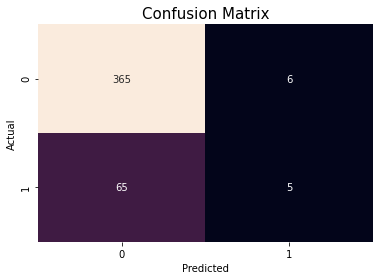


Recall:                   0.07142857142857142
Specificity:              0.9838274932614556
Precision:                0.45454545454545453
Balanced Accuracy:        0.5276280323450135
F1-Score:                 0.12345679012345678


<BarContainer object of 5 artists>

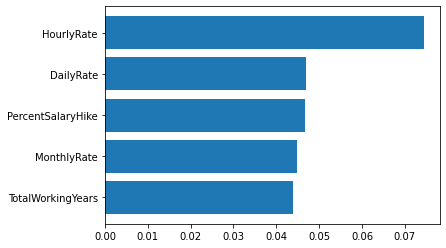

In [15]:
# Fit Model to Default Classifier
clf = RandomForestClassifier().fit(PCA_X_train, PCA_y_train.values.ravel())

# Calcualate Training and Testing Accuracy
testing_accuracy, y_test_pred = modelAccuracy(clf,  PCA_X_train, PCA_X_test)

# Print Confusion Matrix
cm = confusionMatrix(PCA_y_test, y_test_pred)

# Heat Map
heatMap(PCA_y_test, y_test_pred)

# Print Metrics
recall, specificity, precision, balanced_accuracy, F1 = metrics(cm, PCA_y_test, y_test_pred)

# Populate Table
Table['Random Forest Default Classifier With PCA'] = ['RandomForestClassifier()', testing_accuracy, recall, specificity, precision, balanced_accuracy, F1]

#Feature Importance
top_n = np.argsort(clf.feature_importances_)[-5:]
plt.barh(X.columns[top_n], clf.feature_importances_[top_n])

### Random Forest GridSearch with PCA

Best Estimator:
RandomForestClassifier(min_samples_split=5, n_estimators=200) 

Training Accuracy:  0.923226433430515
Testing Accuracy:   0.8526077097505669

                  Predicted Negative  Predicted Positive
Actual Negative                 370                   1
Actual Positive                  64                   6


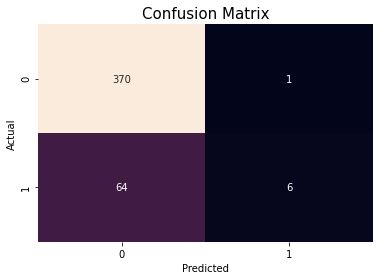


Recall:                   0.08571428571428572
Specificity:              0.9973045822102425
Precision:                0.8571428571428571
Balanced Accuracy:        0.5415094339622641
F1-Score:                 0.15584415584415584


<BarContainer object of 5 artists>

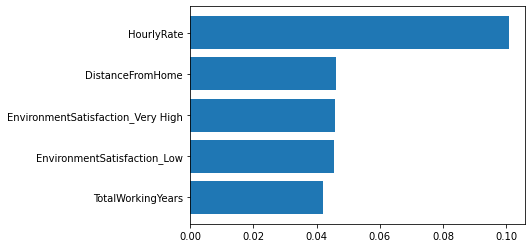

In [16]:
# Determine Best Estimator
params = dict(
    min_samples_split = [5, 10, 20, 30, 40, 50],
    max_depth = [1,2,3,None],
    n_estimators = [50, 100, 150, 200, 250]
)
best_estimator = gridSearcBestEstimator(RandomForestClassifier(), params, cv, PCA_X_train, PCA_y_train)

# Fit Model to best_estimator
clf = best_estimator.fit(PCA_X_train, PCA_y_train.values.ravel())

# Calcualate Training and Testing Accuracy
testing_accuracy, y_test_pred = modelAccuracy(clf, PCA_X_train, PCA_X_test)

# Print Confusion Matrix
cm = confusionMatrix(PCA_y_test, y_test_pred)

# Heat Map
heatMap(PCA_y_test, y_test_pred)

# Print Metrics
recall, specificity, precision, balanced_accuracy, F1 = metrics(cm, PCA_y_test, y_test_pred)

# Populate Table
Table['Random Forest Best Estimator PCA'] = ['RandomForestClassifier(min_samples_split = 5, n_estimators=150)', testing_accuracy, recall, specificity, precision, balanced_accuracy, F1]

#Feature Importance
top_n = np.argsort(clf.feature_importances_)[-5:]
plt.barh(X.columns[top_n], clf.feature_importances_[top_n])

### Random Forest Default Classifier with KPCA

Training Accuracy:  1.0
Testing Accuracy:   0.8458049886621315

                  Predicted Negative  Predicted Positive
Actual Negative                 371                   0
Actual Positive                  68                   2


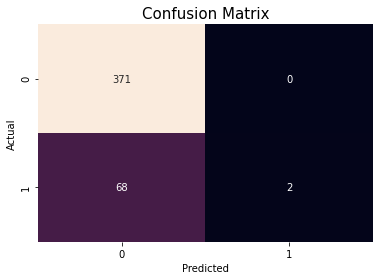


Recall:                   0.02857142857142857
Specificity:              1.0
Precision:                1.0
Balanced Accuracy:        0.5142857142857142
F1-Score:                 0.05555555555555556


<BarContainer object of 5 artists>

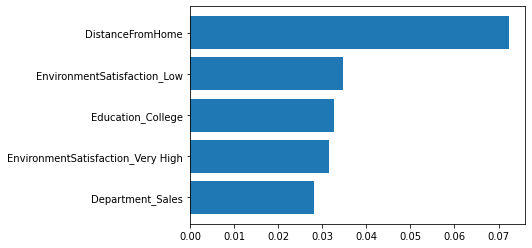

In [17]:
# Fit Model to Default Classifier
clf = RandomForestClassifier().fit(KPCA_X_train, KPCA_y_train.values.ravel())

# Calcualate Training and Testing Accuracy
testing_accuracy, y_test_pred = modelAccuracy(clf,  KPCA_X_train, KPCA_X_test)

# Print Confusion Matrix
cm = confusionMatrix(KPCA_y_test, y_test_pred)

# Heat Map
heatMap(KPCA_y_test, y_test_pred)

# Print Metrics
recall, specificity, precision, balanced_accuracy, F1 = metrics(cm, KPCA_y_test, y_test_pred)

# Populate Table
Table['Random Forest Default Classifier With KPCA'] = ['RandomForestClassifier()', testing_accuracy, recall, specificity, precision, balanced_accuracy, F1]

#Feature Importance
top_n = np.argsort(clf.feature_importances_)[-5:]
plt.barh(X.columns[top_n], clf.feature_importances_[top_n])

### GridSearch Random Forest with KPCA

Best Estimator:
RandomForestClassifier(min_samples_split=5, n_estimators=50) 

Training Accuracy:  0.9990281827016521
Testing Accuracy:   0.8435374149659864

                  Predicted Negative  Predicted Positive
Actual Negative                 371                   0
Actual Positive                  69                   1


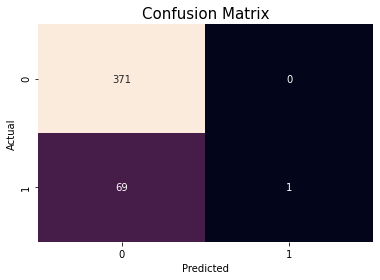


Recall:                   0.014285714285714285
Specificity:              1.0
Precision:                1.0
Balanced Accuracy:        0.5071428571428571
F1-Score:                 0.028169014084507043


<BarContainer object of 5 artists>

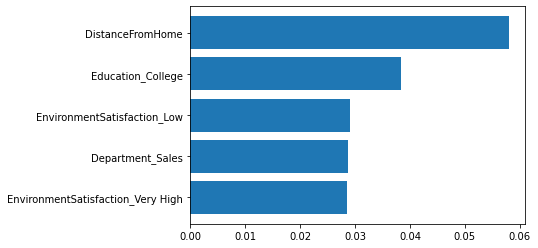

In [18]:
# Determine Best Estimator
params = dict(
    min_samples_split = [5, 10, 20, 30, 40, 50],
    max_depth = [1,2,3,None],
    n_estimators = [50, 100, 150, 200, 250]
)
best_estimator = gridSearcBestEstimator(RandomForestClassifier(), params, cv, KPCA_X_train, KPCA_y_train)

# Fit Model to best_estimator
clf = best_estimator.fit(KPCA_X_train, KPCA_y_train.values.ravel())

# Calcualate Training and Testing Accuracy
testing_accuracy, y_test_pred = modelAccuracy(clf, KPCA_X_train, KPCA_X_test)

# Print Confusion Matrix
cm = confusionMatrix(KPCA_y_test, y_test_pred)

# Heat Map
heatMap(KPCA_y_test, y_test_pred)

# Print Metrics
recall, specificity, precision, balanced_accuracy, F1 = metrics(cm, KPCA_y_test, y_test_pred)

# Populate Table
Table['Random Forest Best Estimator With KPCA'] = ['RandomForestClassifier(min_samples_split = 5)', testing_accuracy, recall, specificity, precision, balanced_accuracy, F1]

#Feature Importance
top_n = np.argsort(clf.feature_importances_)[-5:]
plt.barh(X.columns[top_n], clf.feature_importances_[top_n])

In [19]:
Table = Table.T
Table.sort_values(by=['Balanced Accuracy'], ascending=False)

,Model,Testing Accuracy,Recall,Specificity,Precision,Balanced Accuracy,F1 Score
Random Forest Best Estimator PCA,"RandomForestClassifier(min_samples_split = 5, ...",0.852608,0.085714,0.997305,0.857143,0.541509,0.155844
Random Forest Default Classifier,RandomForestClassifier(),0.85034,0.085714,0.994609,0.75,0.540162,0.153846
Random Forest Best Estimator,"RandomForestClassifier(min_samples_split = 5, ...",0.85034,0.085714,0.994609,0.75,0.540162,0.153846
Random Forest Default Classifier With PCA,RandomForestClassifier(),0.839002,0.071429,0.983827,0.454545,0.527628,0.123457
Random Forest Default Classifier With KPCA,RandomForestClassifier(),0.845805,0.028571,1.0,1.0,0.514286,0.055556
Random Forest Best Estimator With KPCA,RandomForestClassifier(min_samples_split = 5),0.843537,0.014286,1.0,1.0,0.507143,0.028169


### Conclusions

As we can see, none of the random forest models do particularly well. The balanced accuracies of all models are poor and the recall is pitiful. The balanced accuracies are barely different, the difference between the best and worst models are only a few percentage points. The Random Forest Best Estimator with PCA, Default Classifier with all data, and Best Estimator with all data performed very similarly across all scores. The only real difference is that precision was higher for the best estimator PCA.

For these models we saw that the best indicators of attrition were Age, Total Working Years, Daily Rate, Monthly Rate, Distance from Home, Years at Company, and Environmental Satisfaction. Hourly Rate, Distance from Home, and Total Working Years were of the top five predictors in all 3 models. While Distance from Home and Total Working Years are out of the employer's control, their pay or hourly rate is within their control and could be a powerful tool in lowering employee attrition. 